# **Autoregressive Conditional Heteroskedasticity**

Perfecto — vamos a desmenuzar **ARCH** desde su origen teórico, para que entiendas exactamente qué es, por qué existe y cómo se formula.

---

## 1. Contexto histórico y motivación

Antes de Engle (1982), los modelos de series temporales solían asumir **homocedasticidad**:

$$
Var(\varepsilon_t) = \sigma^2 \ \text{constante}
$$

Pero en series financieras se observa **clustering de volatilidad**: periodos largos de varianza alta seguidos por periodos de varianza baja.

Engle introduce el **Autoregressive Conditional Heteroskedasticity (ARCH)** para capturar ese fenómeno:

* **Autoregressive**: la varianza depende de valores pasados.
* **Conditional**: todo es condicional a la información pasada $\mathcal{F}_{t-1}$.
* **Heteroskedasticity**: la varianza cambia con el tiempo.

---

## 2. Estructura del modelo ARCH(q)

Partimos de una **ecuación de la media** (puede ser un AR, ARMA, etc.):

$$
y_t = \mu_t + \varepsilon_t
$$

donde:

$$
\varepsilon_t = \sigma_t z_t, \quad z_t \stackrel{i.i.d.}{\sim} (0,1)
$$

La **varianza condicional** en ARCH(q) se define como:

$$
\sigma_t^2 = \omega + \sum_{i=1}^q \alpha_i \varepsilon_{t-i}^2
$$

con:

* $\omega > 0$
* $\alpha_i \ge 0$ para asegurar positividad
* $q$: número de rezagos de los errores al cuadrado usados

---

## 3. Intuición económica

* Si hubo un gran shock en el pasado ($\varepsilon_{t-i}^2$ grande), la varianza condicional actual aumenta.
* Esto modela el hecho empírico de que los choques tienden a agruparse (volatility clustering).
* Si los shocks pasados fueron pequeños, la volatilidad esperada para hoy es baja.

---

## 4. Ejemplo simple: ARCH(1)

**Media** (para simplificar, asumamos media cero):

$$
y_t = \varepsilon_t
$$

**Varianza condicional**:

$$
\sigma_t^2 = \omega + \alpha_1 \varepsilon_{t-1}^2
$$

**Interpretación**:

* $\omega$ → nivel base de volatilidad
* $\alpha_1$ → sensibilidad de la volatilidad a shocks recientes

**Varianza incondicional** (si existe):

$$
Var(y_t) = \frac{\omega}{1 - \alpha_1}, \quad \alpha_1 < 1
$$

---

## 5. Limitaciones del ARCH

* Necesita $q$ grande para series con alta persistencia → muchos parámetros → ineficiencia.
* No captura asimetrías (volatilidad diferente para shocks positivos y negativos).
* Fue extendido a **GARCH** para resolver el problema de persistencia sin tantos parámetros.

---

📌 **Resumen conceptual:**
El ARCH no “modela la media” sino la **varianza condicional** de los residuos. Su rol es decir: *“¿dado lo que pasó ayer y antes, cuánta incertidumbre espero hoy?”*.

---

Si quieres, puedo hacerte **un ejemplo numérico** paso a paso, simulando una serie ARCH(1) y mostrando cómo la varianza condicional se ajusta dinámicamente a shocks grandes y pequeños. Así verías la intuición de forma visual.


Vamos por partes, porque aquí hay tres puntos que se entrelazan pero responden a lógicas distintas:

---

## 1. **Por qué los residuos se escriben como**

$$
\varepsilon_t = \sigma_t \, z_t
$$

**(o “stdₜ × zₜ”)**

Esto es simplemente una **descomposición multiplicativa**:

* $\varepsilon_t$ = la *innovación* o “ruido” del modelo en el instante $t$.
* $\sigma_t$ = **desviación estándar condicional** dada la información pasada $\mathcal{F}_{t-1}$.
* $z_t$ = *ruido estandarizado* con media 0 y varianza 1 ($z_t \stackrel{i.i.d.}{\sim}(0,1)$).

**Intuición:**
Piensa que $z_t$ es el “patrón puro” del shock, y $\sigma_t$ es el “amplificador” que le da la magnitud según cuánta volatilidad hay en ese momento.

* Si $\sigma_t$ es grande, el mismo $z_t$ produce un shock grande.
* Si $\sigma_t$ es pequeña, el shock se atenúa.

Esto es análogo a la física:

$$
\text{Impacto} = \text{Intensidad relativa} \times \text{Escala actual}
$$

---

## 2. **Por qué la varianza condicional se modela como**

$$
\sigma_t^2 = \omega + \text{AR en } \varepsilon_{t-i}^2
$$

(o “$w + \text{ARCH}$”)

La lógica es empírica y estadística:

* En datos financieros, **la varianza condicional suele correlacionarse con los cuadrados de shocks pasados**: cuando ayer hubo un shock grande, hoy suele haber alta volatilidad.
* Esto sugiere que la secuencia $\{\varepsilon_t^2\}$ tiene estructura AR(p) (autoregresiva) **aunque la serie original $y_t$ no la tenga**.

Por eso Engle planteó:

$$
\sigma_t^2 = \omega + \alpha_1 \varepsilon_{t-1}^2 + \dots + \alpha_q \varepsilon_{t-q}^2
$$

que es literalmente un **AR(q)** pero aplicado a los residuos al cuadrado (varianza condicional).

**Interpretación:**

* $\omega$ → nivel base de volatilidad (lo mínimo esperable sin shocks recientes).
* $\alpha_i$ → sensibilidad de la volatilidad a shocks ocurridos $i$ pasos atrás.

---

## 3. **Por qué cambia la letra de $\sigma_t$ a $\varepsilon_t$**

Esto es porque son **cosas distintas**:

* $\sigma_t$: desviación estándar condicional en $t$ → mide la escala de la incertidumbre esperada.
* $\varepsilon_t$: residuo o innovación en $t$ → el shock *realizado* (ya ocurrió).
  Se obtiene como:

  $$
  \varepsilon_t = y_t - \hat{\mu}_t
  $$

  donde $\hat{\mu}_t$ es la media condicional (ARIMA, por ejemplo).

Relación:

$$
\varepsilon_t = \sigma_t z_t
$$

→ $\sigma_t$ es la magnitud *esperada*, $\varepsilon_t$ es el shock *observado*, y $z_t$ es el shock *estandarizado*.

---

📌 **Resumen intuitivo:**

1. **Descomposición**: innovación = escala × shock estándar.
2. **Varianza como AR en $\varepsilon^2$**: porque los cuadrados de los shocks muestran autocorrelación → modelable como AR.
3. **Cambio de letras**: $\sigma_t$ es “antes de ver el shock” (predicho), $\varepsilon_t$ es “después de verlo” (realizado).

---

Si quieres, puedo hacerte un **dibujo temporal** donde en cada instante se vea:

* la media condicional ($\mu_t$),
* el shock predicho ($\sigma_t$),
* el shock realizado ($\varepsilon_t$),
  para que veas la relación causal entre ellos. Esto deja cristalina la intuición.


En un **ARCH(q)**, el parámetro $\omega$ (a veces llamado $\alpha_0$ en algunas notaciones) **denota el nivel base o “piso” de la varianza condicional**.  

---

## 1. Definición formal
En el modelo:
$$
\sigma_t^2 = \omega + \sum_{i=1}^q \alpha_i \varepsilon_{t-i}^2
$$
- $\sigma_t^2$ = varianza condicional en $t$ (esperada dado el pasado).
- $\varepsilon_{t-i}^2$ = magnitud de shocks pasados.
- $\omega > 0$ = componente constante que asegura que la varianza condicional nunca sea cero.

---

## 2. **Interpretación intuitiva**
- **Piso de volatilidad**: aunque no haya shocks recientes ($\varepsilon_{t-i}^2 \approx 0$), la varianza condicional sigue siendo $\omega$.  
- **Volatilidad de largo plazo**: en un ARCH estacionario, $\omega$ está directamente relacionado con la **varianza incondicional**:
$$
Var(y_t) = \frac{\omega}{1 - \sum_{i=1}^q \alpha_i}
$$
- Cuanto mayor sea $\omega$, mayor es el nivel promedio de volatilidad en ausencia de choques recientes.

---

## 3. **Ejemplo en ARCH(1)**
$$
\sigma_t^2 = \omega + \alpha_1 \varepsilon_{t-1}^2
$$
- Si ayer ($t-1$) no hubo shock ($\varepsilon_{t-1} \approx 0$), la volatilidad de hoy es $\sigma_t^2 \approx \omega$.  
- Si ayer hubo un shock grande, la volatilidad de hoy será mayor a $\omega$, por la suma del efecto $\alpha_1 \varepsilon_{t-1}^2$.

---

📌 **Resumen rápido:**  
$\omega$ en ARCH es el **nivel mínimo de volatilidad condicional** y sirve como ancla para la varianza de largo plazo. Sin $\omega$, el modelo podría predecir volatilidad cero después de periodos tranquilos, lo que no es realista.  

---

Si quieres, puedo mostrarte **cómo estimar $\omega$ y $\alpha_i$** a partir de datos reales y cómo interpretar su magnitud en términos de “volatilidad base” y “persistencia de choques”.'''


Excelente pregunta. En **ARCH/GARCH** los parámetros $\omega,\ \alpha_i,\ \beta_j$ se estiman casi siempre por **máxima verosimilitud (MLE)** (o **QMLE** gaussiana), típicamente **conjunta** con la ecuación de media (ARIMA/SARIMA). Resumen ejecutivo y luego el “hueso” matemático:

# 1) Esqueleto del problema de estimación

**Modelo (media + varianza):**

$$
\begin{aligned}
y_t &= \mu_t(\vartheta) + \varepsilon_t,\qquad \varepsilon_t=\sigma_t z_t,\quad \mathbb{E}(z_t)=0,\ \mathbb{V}(z_t)=1,\\
\sigma_t^2 &= \omega + \sum_{i=1}^q \alpha_i \varepsilon_{t-i}^2 + \sum_{j=1}^p \beta_j \sigma_{t-j}^2,
\end{aligned}
$$

con restricciones habituales: $\omega>0,\ \alpha_i\ge 0,\ \beta_j\ge 0,\ \sum \alpha_i+\sum \beta_j<1$ (para varianza incondicional finita).

**Vector de parámetros:** $\theta=(\vartheta,\omega,\alpha_1,\ldots,\alpha_q,\beta_1,\ldots,\beta_p,\text{(parámetros de la distribución de }z_t))$.

# 2) Verosimilitud condicional

Dada la historia $\mathcal{F}_{t-1}$, la densidad de $\varepsilon_t$ es la de $z_t$ reescalada por $\sigma_t$. Las tres elecciones más comunes:

**(a) Gaussiana (QMLE):**

$$
\ell_t(\theta) \;=\; -\tfrac12\Big(\log 2\pi + \log\sigma_t^2 + \tfrac{\varepsilon_t^2}{\sigma_t^2}\Big).
$$

Se maximiza $\mathcal{L}(\theta)=\sum_{t=T_0+1}^{T}\ell_t(\theta)$.
**Propiedad clave:** aun si $z_t$ no es normal, la **QMLE gaussiana es consistente** bajo condiciones regulares (y se usan errores estándar robustos tipo Bollerslev–Wooldridge/sandwich).

**(b) t–Student (colas pesadas):** con $\nu>2$,

$$
\ell_t(\theta) \;=\; \log\Gamma\!\Big(\tfrac{\nu+1}{2}\Big) - \log\Gamma\!\Big(\tfrac{\nu}{2}\Big) - \tfrac12\log\big[(\nu-2)\pi\big]
- \tfrac12\log\sigma_t^2 \;-\; \tfrac{\nu+1}{2}\log\!\Big(1+\tfrac{\varepsilon_t^2}{(\nu-2)\sigma_t^2}\Big).
$$

**(c) GED/Generalized Error:** análogo; útil para curtosis excesiva.

# 3) Algoritmo práctico (pasos)

1. **Especifica la media** $\mu_t(\vartheta)$ (p.ej., ARIMA).
2. **Inicializa** $\sigma_0^2$ (varianza muestral de $\varepsilon_t$, o la incondicional si la conoces).
3. **Recursiona** $\sigma_t^2$ con la ecuación GARCH para $t=T_0+1,\dots,T$.
4. **Maximiza** $\sum\ell_t(\theta)$ con un optimizador restringido (BFGS/L-BFGS-B/Nelder-Mead), imponiendo $\omega>0,\ \alpha_i,\beta_j\ge 0$.

   * Truco común: reparametrizar $\omega=\exp(\tilde\omega)$, $\alpha_i=\exp(\tilde\alpha_i)/(1+\cdot)$ para garantizar positividad.
5. **Infiere** con la **Hessiana** inversa o **errores robustos** (sandwich).
6. **Diagnóstico:**

   * ACF/PACF de $\hat\varepsilon_t$ debe lucir ruido blanco.
   * ACF de $\hat\varepsilon_t^2$ sin estructura; **ARCH-LM** sobre $\hat\varepsilon_t$ debe no-rechazar.
   * Normalidad de $z_t=\hat\varepsilon_t/\hat\sigma_t$ (a menudo se rechaza → considerar t-Student/GED).
7. **Selección de orden** $(p,q)$: AIC/BIC y tests sobre residuos al cuadrado.

# 4) “Variance targeting” (muy usado)

Para GARCH(1,1), fija la varianza incondicional $\bar v$ al momento de estimar:

$$
\bar v = \operatorname{Var}(\varepsilon_t)\ \approx\ \widehat{\operatorname{Var}}(\hat\varepsilon_t),
\qquad
\omega = (1-\alpha-\beta)\,\bar v.
$$

Se optimiza solo en $(\alpha,\beta)$ (y $\vartheta$), mejorando estabilidad numérica y interpretabilidad.

# 5) Dos enfoques de ajuste

* **Conjunto (joint MLE):** estimar $\vartheta$ (media) y $(\omega,\alpha,\beta)$ simultáneamente → eficiente.
* **En dos etapas:** (i) ajustar la media, obtener $\hat\varepsilon_t$; (ii) ajustar GARCH sobre $\hat\varepsilon_t$. Suele ser buen inicializador para la estimación conjunta.

# 6) Pronóstico

Con $\hat\theta$ en mano:

$$
\widehat{\mu}_{t+h|t}\ \text{(ARIMA)},\qquad
\widehat{\sigma}^2_{t+1|t}=\hat\omega+\hat\alpha\,\hat\varepsilon_t^2+\hat\beta\,\hat\sigma_t^2,\quad
\widehat{\sigma}^2_{t+h|t}\ \text{vía iteración}.
$$

Esto alimenta **bandas de predicción** y métricas de riesgo (VaR/CVaR).

# 7) Condiciones y restricciones clave

* **Positividad:** $\omega>0,\ \alpha_i,\beta_j\ge 0$.
* **Estacionariedad en varianza:** $\sum\alpha_i+\sum\beta_j<1$ (GARCH convencional).
* **t–Student:** $\nu>2$ para varianza finita.
* **EGARCH/GJR:** la forma de $\ell_t$ cambia, pero el principio MLE/QMLE es el mismo.

---

## Fórmula canónica a recordar (Gauss QMLE)

$$
\boxed{ \;\max_{\theta}\ \sum_{t}\left[-\tfrac12\Big(\log(2\pi)+\log\sigma_t^2(\theta)+\tfrac{\varepsilon_t(\theta)^2}{\sigma_t^2(\theta)}\Big)\right]\ ;\ }
$$

donde $\varepsilon_t(\theta)=y_t-\mu_t(\vartheta)$ y $\sigma_t^2(\theta)$ viene de la recursión ARCH/GARCH.
La “magia” está en que **$\omega,\alpha,\beta$** son los que **maximizan** esa verosimilitud sujeta a las restricciones.

---

Si quieres, te dejo un mini “checklist” operativo (muy útil en práctica):

1. Identifica la media (ARIMA) → quita autocorrelación.
2. Test ARCH-LM en residuos → ¿hay heterocedasticidad condicional?
3. Elige GARCH(1,1) como base; considera t-Student.
4. Estima por QMLE (o MLE-t) con variance targeting.
5. Verifica residuos estandarizados $z_t$ y $z_t^2$.
6. Ajusta órdenes/distribución si hay problemas → EGARCH/GJR si hay asimetría; GED/t si hay colas.

Si te sirve, puedo pasarte **pseudocódigo** de la rutina de MLE (con L-BFGS-B y restricciones) o un script listo para correr.


Estimación ARCH(1) por MCO:
omega_hat = 0.088097 ± 0.020793
alpha_hat = 0.475560 ± 0.044521
var_incond_hat = 0.167984


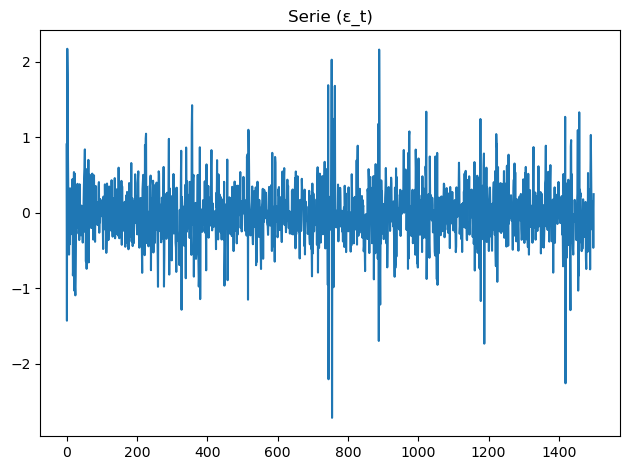

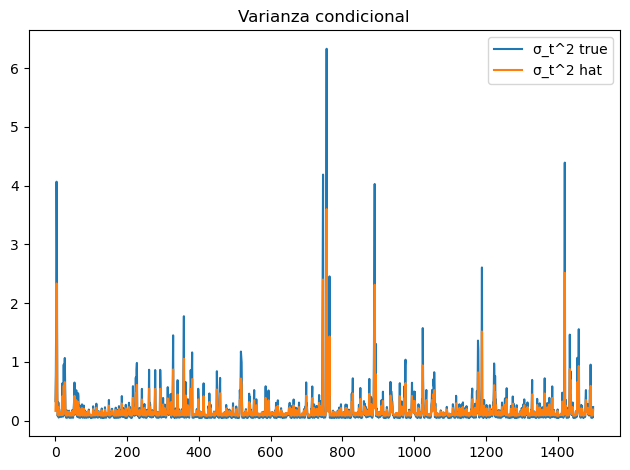

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq

def acf(x, max_lag):
    x = np.asarray(x)
    x = x - x.mean()
    n = len(x)
    acf_vals = np.empty(max_lag + 1)
    var = np.dot(x, x) / n
    for k in range(max_lag + 1):
        cov = np.dot(x[: n - k], x[k:]) / n
        acf_vals[k] = cov / var
    return acf_vals

def simulate_arch1(T, omega, alpha, rng=None):
    if rng is None:
        rng = np.random.default_rng(12345)
    eps = np.zeros(T)
    sigma2 = np.zeros(T)
    if alpha >= 1:
        raise ValueError("alpha debe ser < 1 para varianza finita.")
    var_uncond = omega / (1 - alpha)
    sigma2[0] = var_uncond
    z = rng.standard_normal(T)
    eps[0] = np.sqrt(sigma2[0]) * z[0]
    for t in range(1, T):
        sigma2[t] = omega + alpha * eps[t - 1] ** 2
        eps[t] = np.sqrt(sigma2[t]) * z[t]
    return eps, sigma2

def estimate_arch1_ols(eps):
    y = eps[1:] ** 2
    X = np.column_stack([np.ones(len(eps) - 1), eps[:-1] ** 2])
    beta_hat, residuals, rank, s = lstsq(X, y, rcond=None)
    omega_hat, alpha_hat = beta_hat
    n, k = X.shape
    if residuals.size == 0:
        y_hat = X @ beta_hat
        u = y - y_hat
        sigma2_u = (u @ u) / (n - k)
    else:
        sigma2_u = residuals[0] / (n - k)
    XtX_inv = np.linalg.inv(X.T @ X)
    se_beta = np.sqrt(np.diag(sigma2_u * XtX_inv))
    se_omega, se_alpha = se_beta
    sigma2_hat = np.zeros_like(eps)
    var_uncond_hat = omega_hat / max(1e-8, (1 - alpha_hat)) if (1 - alpha_hat) > 1e-8 else np.var(eps)
    sigma2_hat[0] = var_uncond_hat
    for t in range(1, len(eps)):
        sigma2_hat[t] = omega_hat + alpha_hat * eps[t - 1] ** 2
    return (omega_hat, alpha_hat, se_omega, se_alpha, sigma2_hat)

def forecast_sigma2_h(omega, alpha, sigma2_T, eps_T, h):
    path = np.zeros(h)
    path[0] = omega + alpha * (eps_T ** 2)
    for s in range(1, h):
        path[s] = omega + alpha * path[s - 1]
    return path

if __name__ == "__main__":
    T = 1500
    omega_true = 0.05
    alpha_true = 0.85
    rng = np.random.default_rng(20250812)
    eps, sigma2_true = simulate_arch1(T, omega_true, alpha_true, rng=rng)
    omega_hat, alpha_hat, se_omega, se_alpha, sigma2_hat = estimate_arch1_ols(eps)
    print("Estimación ARCH(1) por MCO:")
    print(f"omega_hat = {omega_hat:.6f} ± {1.96*se_omega:.6f}")
    print(f"alpha_hat = {alpha_hat:.6f} ± {1.96*se_alpha:.6f}")
    print(f"var_incond_hat = {omega_hat/(1-alpha_hat):.6f}")
    # Gráficas rápidas
    plt.figure(); plt.plot(eps); plt.title("Serie (ε_t)"); plt.tight_layout(); plt.show()
    plt.figure(); plt.plot(sigma2_true, label="σ_t^2 true"); plt.plot(sigma2_hat, label="σ_t^2 hat"); plt.legend(); plt.title("Varianza condicional"); plt.tight_layout(); plt.show()


Sí: igual que en ARIMA, en GARCH hay un **protocolo de diagnóstico**. Cambia el foco: en ARIMA inspeccionas autocorrelación de $y_t$; en GARCH inspeccionas **autocorrelación de la energía** ($\varepsilon_t^2$) y la idoneidad de $\sigma_t^2$. Aquí va el checklist mínimo-razonable (teórico y operativo):

# 1) Pre-ajuste: limpiar la media

1. Ajusta $\mu_t$ (AR/ARMA/ARIMA/SARIMA) hasta lograr **residuos sin autocorrelación**:

   $$
   \hat\varepsilon_t \;=\; y_t-\hat\mu_t,\quad \text{LB‐Q sobre } \hat\varepsilon_t \text{ no debe rechazar}.
   $$

   **Ljung–Box**: $Q(m)=T(T+2)\sum_{k=1}^m \frac{\hat\rho_k^2}{T-k}\ \overset{H_0}{\sim} \chi^2_m$.

2. Test de **efecto ARCH** en $\hat\varepsilon_t$:
   Regresa $\hat\varepsilon_t^2$ sobre $1,\ \hat\varepsilon_{t-1}^2,\dots,\hat\varepsilon_{t-m}^2$.
   Estadístico **ARCH–LM**: $TR^2 \ \overset{H_0}{\sim}\ \chi^2_m$. Si rechaza, hay heterocedasticidad condicional ⇒ procede GARCH.

# 2) Especificación y restricciones (ex ante)

Para GARCH($p,q$):

$$
\sigma_t^2=\omega+\sum_{i=1}^q \alpha_i \varepsilon_{t-i}^2+\sum_{j=1}^p \beta_j \sigma_{t-j}^2,
$$

con **positividad** $\omega>0,\ \alpha_i,\beta_j\ge 0$ y **estacionariedad en 2º momento** (p. ej. en (1,1): $\alpha+\beta<1$).
Si $\alpha+\beta\approx 1$ ⇒ **IGARCH** (varianza incondicional infinita, persistencia cuasi-unitaria).
Para momentos altos (4º momento finito en (1,1)):

$$
\beta^2 + 2\alpha\beta + \alpha^2\,\mathbb{E}(z_t^4) < 1
$$

($\mathbb{E}(z_t^4)=3$ si Normal; mayor con **colas pesadas**).

# 3) Ajuste (MLE/QMLE) y distribución de $z_t$

* Estima por **QMLE gaussiana** o **t-Student** si hay curtosis alta.
* Usa **errores robustos (Bollerslev–Wooldridge)** si mantienes Gauss con colas pesadas.

# 4) Post-ajuste: residuos estandarizados

Construye $\hat z_t = \hat\varepsilon_t/\hat\sigma_t$. Deben ser **i.i.d.(0,1)**:

1. **Independencia**: Ljung–Box sobre $\hat z_t$ y sobre $\hat z_t^2$ (ambas no deben rechazar).
2. **Normalidad** (si usaste Gauss): Q–Q plot y **Jarque–Bera**; si falla sistemáticamente ⇒ re-estima con t/GED.
3. **Efecto ARCH remanente**: ARCH–LM sobre $\hat z_t$ o $\hat\varepsilon_t/\hat\sigma_t$; si rechaza ⇒ orden insuficiente o mala familia.
4. **Asimetría (leverage)**: tests de **Engle–Ng** (sign/size bias). Si hay sesgo de signo, cambia a **EGARCH / GJR / APARCH**.

# 5) Selección de orden y parsimonia

* Compara $(p,q)$ por **AIC/BIC** y por diagnóstico de residuos.
* Regla práctica: empieza por **GARCH(1,1)**; sube orden solo si quedan patrones en $\hat z_t^2$.

# 6) Estabilidad y quiebres

* **Rolling/recursive**: re-estima en ventanas y grafica $(\hat\alpha+\hat\beta)$ y $\hat\omega$.
* Tests de cambio estructural (sup-Wald/QLR) si sospechas **regímenes**.

# 7) Validación predictiva (riesgo/derivados)

1. **Backtest de VaR** (si tu objetivo es riesgo):

   * **Kupiec (unconditional coverage)**: ¿tasa de violaciones = nivel nominal?
   * **Christoffersen (conditional coverage)**: independencia de violaciones.
2. **Evaluación de $\sigma^2$**: compara $\widehat{\sigma^2}_{t+h|t}$ contra un **proxy** (p. ej., realized variance) vía MSE/QLIKE y **Diebold–Mariano** para comparar modelos.

# 8) Señales de mala especificación (red flags)

* ACF/PACF de $\hat z_t^2$ con picos ⇒ orden bajo o falta de leverage/colas pesadas.
* $\hat\alpha+\hat\beta>1$ ⇒ no estacionario; si ≈1 de forma persistente, considera **FIGARCH** (memoria larga) o **IGARCH** explícito.
* Normalidad rechazada fuerte + colas en Q–Q ⇒ usa **t** o **GED**.
* Sign bias significativo ⇒ adopta **EGARCH/GJR**.

---

### “Mapa mental” rápido (análogo a ARIMA)

* **ARIMA:** ACF/PACF de $y_t$ → orden; LB–Q en residuos.
* **GARCH:** ACF/PACF de $\hat\varepsilon_t^2$ → orden; ARCH–LM; LB–Q en $ \hat z_t, \hat z_t^2$; normalidad/colas; leverage.

> *Heidegger diría:* “la media oculta, la volatilidad desoculta.” Diagnosticar GARCH es, pues, dejar hablar a $\hat\varepsilon_t^2$ hasta que callen sus correlaciones.

Si quieres, te preparo un **notebook** que: (i) ajusta ARIMA→GARCH, (ii) corre **ARCH-LM, Ljung–Box, JB, Engle–Ng**, (iii) hace **backtest VaR**, y (iv) compara **Gauss vs t** con QLIKE y Diebold–Mariano; todo con gráficos didácticos.


Aviso: Fallo en descarga: 'str' object is not callable -> usando serie S&P500 sintética (demo offline).


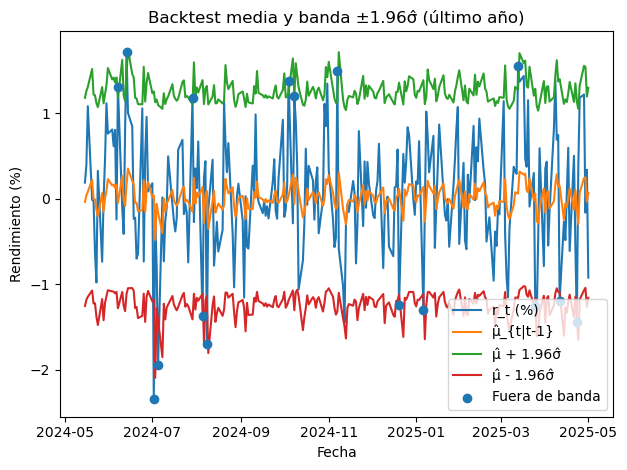

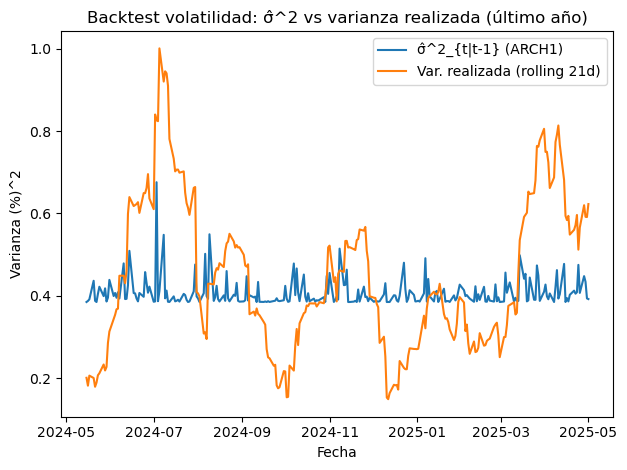

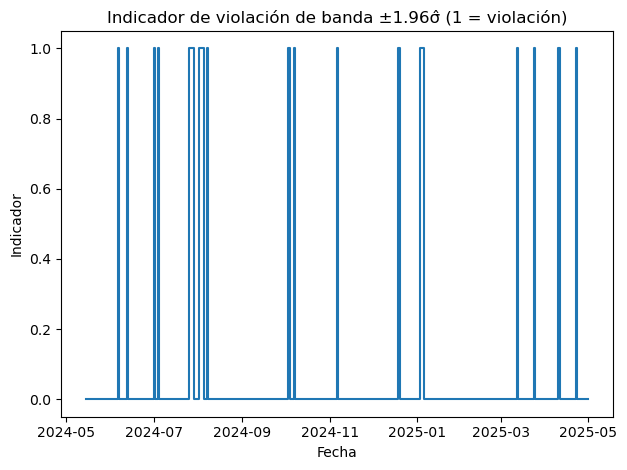

=== Resumen de estimación ===
MEDIA: AR(1) OLS: phi=0.206
VOL (ARCH1): arch (t-dist) QMLE  -> omega=0.384980, alpha=0.051390

Resumen 'arch':
                           Zero Mean - ARCH Model Results                           
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -3621.28
Distribution:      Standardized Student's t   AIC:                           7248.55
Method:                  Maximum Likelihood   BIC:                           7267.24
                                              No. Observations:                 3746
Date:                      Wed, Aug 13 2025   Df Residuals:                     3746
Time:                              17:23:55   Df Model:                            0
                              Volatility Model                              
                

In [1]:
# -*- coding: utf-8 -*-
"""
Backtest: predicción de MEDIA (ARIMA/AR(1)) y VOLATILIDAD (ARCH(1)) del S&P 500
-------------------------------------------------------------------------------
- Descarga ^GSPC (yfinance). Si no hay internet o lib, usa una serie sintética.
- Mean: pmdarima.auto_arima (si está disponible); si no, AR(1) por MCO.
- Vol: ARCH(1) (paquete 'arch' si está disponible); si no, OLS sobre eps^2.
- Backtest 1-step-ahead en el ÚLTIMO AÑO (~252 días):
    μ̂_{t+1|t} y σ̂^2_{t+1|t} = ω̂ + α̂ ε_t^2
- Gráficas solicitadas:
    (1) r_t vs μ̂_{t|t-1} + banda μ̂ ± 1.96 σ̂
    (2) σ̂^2_{t|t-1} (pred) vs proxy de var. realizada (rolling 21d de r^2)
    (3) Violaciones respecto a banda (útil para intuición de cobertura)
- Se guarda un script reutilizable.

Requisitos recomendados:
    pip install yfinance pmdarima arch
"""

import warnings, os, inspect
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------- Librerías opcionales ----------
try:
    import yfinance as yf
except Exception:
    yf = None

try:
    import pmdarima as pm
except Exception:
    pm = None

try:
    from arch.univariate import arch_model
except Exception:
    arch_model = None

# --------- Utilidades ----------
def fetch_spx(start="2010-01-01", end=None):
    if yf is None:
        return None, "yfinance no está disponible"
    try:
        data = yf.download("^GSPC", start=start, end=end, progress=False, auto_adjust=True)
        if data is None or data.empty:
            return None, "Descarga vacía o sin internet"
        return data["Close"].rename("Close"), None
    except Exception as e:
        return None, f"Fallo en descarga: {e}"

def synthetic_spx(T=3500, seed=123):
    rng = np.random.default_rng(seed)
    # GARCH(1,1) sintético para volatilidad; media ~ AR(1) leve
    omega, alpha, beta = 0.02, 0.05, 0.9
    phi, mu = 0.2, 0.0
    z = rng.standard_normal(T)
    sigma2 = np.zeros(T)
    eps = np.zeros(T)
    y = np.zeros(T)
    sigma2[0] = omega/(1-alpha-beta)
    eps[0] = np.sqrt(sigma2[0]) * z[0]
    y[0] = mu + eps[0]
    for t in range(1, T):
        sigma2[t] = omega + alpha*eps[t-1]**2 + beta*sigma2[t-1]
        eps[t] = np.sqrt(sigma2[t]) * z[t]
        y[t] = mu + phi*y[t-1] + eps[t]
    # precios a partir de rendimientos porcentuales (y ya está en %)
    price = 1000.0 * np.exp(np.cumsum(y/100.0))
    idx = pd.bdate_range("2010-01-01", periods=T, freq="B")
    s = pd.Series(price, index=idx, name="Close")
    return s

def log_returns(prices: pd.Series) -> pd.Series:
    r = np.log(prices).diff().dropna()
    return r * 100.0  # % para lectura

def split_train_test(series: pd.Series, test_n: int = 252):
    return series.iloc[:-test_n], series.iloc[-test_n:]

def fit_mean_model(r_train: pd.Series):
    """
    Devuelve (callable_predict_next, in_sample_mu, modelo_subyacente, info_str)
    - callable_predict_next(last_obs): función que dada la serie completa hasta t, produce μ̂_{t+1|t}
    - in_sample_mu: predicción dentro de muestra para TRAIN (alineada)
    """
    if pm is not None:
        model = pm.auto_arima(r_train, start_p=0, start_q=0, max_p=3, max_q=3,
                              seasonal=False, stepwise=True, suppress_warnings=True,
                              information_criterion="bic")
        mu_in = pd.Series(model.predict_in_sample(), index=r_train.index)
        def predict_next_with_update(history_series):
            # Usamos el modelo entrenado pero con 'update' incremental de la observación más reciente
            # para generar μ̂_{t+1|t}
            model.update(history_series.iloc[[-1]].values)  # añade último valor a estado interno
            # predecir siguiente (n_periods=1) y revertir update para no contaminar (hacemos copia/clon simple)
            # Nota: pmdarima no facilita snapshot; como alternativa, entrenamos una copia rápida.
            # Para evitar costo alto, haremos 'predict' con el modelo actualizado y aceptamos que avanza.
            # En el backtest iterativo, esto equivale a un filtro recursivo.
            mu_next = model.predict(n_periods=1)[0]
            return mu_next
        info = f"pmdarima.auto_arima BIC-selected: {model.order}"
        return predict_next_with_update, mu_in, model, info
    else:
        # AR(1) por MCO: r_t = c + phi r_{t-1} + e_t
        y = r_train.iloc[1:].values
        x = r_train.iloc[:-1].values
        X = np.column_stack([np.ones_like(x), x])
        beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]
        c, phi = beta_hat
        mu_in = pd.Series(c + phi * r_train.shift(1).dropna(), index=r_train.index[1:])
        def predict_next_with_update(history_series):
            last = history_series.iloc[-1]
            return float(c + phi * last)
        info = f"AR(1) OLS: phi={phi:.3f}"
        return predict_next_with_update, mu_in, beta_hat, info

def fit_arch1_on_resids(eps_train: pd.Series):
    """
    Devuelve (omega_hat, alpha_hat, metodo_info, sigma2_in_sample)
    """
    if arch_model is not None:
        am = arch_model(eps_train, vol="ARCH", p=1, dist="t", rescale=False, mean="Zero")
        res = am.fit(disp="off")
        omega = float(res.params.get("omega", np.nan))
        alpha = float(res.params.get("alpha[1]", np.nan))
        sigma2_in = pd.Series(res.conditional_volatility.values**2, index=eps_train.index)
        return omega, alpha, "arch (t-dist) QMLE", sigma2_in, res
    else:
        # OLS sobre eps_t^2 = ω + α eps_{t-1}^2 + u_t
        e = eps_train.values
        y = e[1:]**2
        x = e[:-1]**2
        X = np.column_stack([np.ones_like(x), x])
        omega_hat, alpha_hat = np.linalg.lstsq(X, y, rcond=None)[0]
        sigma2_in = pd.Series(np.r_[y[0], omega_hat + alpha_hat * e[:-1]**2], index=eps_train.index)
        return float(omega_hat), float(alpha_hat), "OLS en eps^2", sigma2_in, None

# --------- Backtest ----------
def backtest_mean_and_arch(r: pd.Series, test_n=252):
    r_train, r_test = split_train_test(r, test_n=test_n)
    # Media
    predict_next_mu, mu_in_train, mean_model, mean_info = fit_mean_model(r_train)
    # Residuos TRAIN
    mu_in_train_aligned = mu_in_train
    if mu_in_train_aligned.index[0] != r_train.index[0]:
        # alinea si AR(1) omitió el primer punto
        r_train_eff = r_train.loc[mu_in_train_aligned.index]
    else:
        r_train_eff = r_train
    eps_train = r_train_eff - mu_in_train_aligned
    # ARCH(1)
    omega_hat, alpha_hat, arch_info, sigma2_in, arch_res = fit_arch1_on_resids(eps_train)

    # Iteración out-of-sample
    mu_pred = []
    sigma2_pred = []
    eps_last = eps_train.iloc[-1]
    # Construimos serie "histórica" que iremos extendiendo para la media
    hist_series = pd.concat([r_train, pd.Series(dtype=float)])
    for date, r_t in r_test.items():
        # μ̂_{t|t-1}
        mu_next = predict_next_mu(hist_series)
        mu_pred.append(mu_next)
        # σ̂^2_{t|t-1} (ARCH1)
        sigma2_next = omega_hat + alpha_hat * (eps_last**2)
        sigma2_pred.append(sigma2_next)
        # actualizar historia
        hist_series.loc[date] = r_t
        # actualizar residuo para el siguiente paso
        eps_last = r_t - mu_next

    mu_pred = pd.Series(mu_pred, index=r_test.index, name="mu_pred")
    sigma2_pred = pd.Series(sigma2_pred, index=r_test.index, name="sigma2_pred")
    out = {
        "r_train": r_train, "r_test": r_test,
        "mu_in_train": mu_in_train, "eps_train": eps_train,
        "sigma2_in": sigma2_in,
        "mu_pred": mu_pred, "sigma2_pred": sigma2_pred,
        "omega_hat": omega_hat, "alpha_hat": alpha_hat,
        "mean_info": mean_info, "arch_info": arch_info,
        "arch_fit": arch_res
    }
    return out

# --------- Pipeline principal ----------
def run_all():
    prices, err = fetch_spx(start="2010-01-01")
    using_synth = False
    if prices is None:
        print("Aviso:", err, "-> usando serie S&P500 sintética (demo offline).")
        prices = synthetic_spx(T=4000)
        using_synth = True

    r = log_returns(prices)
    res = backtest_mean_and_arch(r, test_n=252)

    # ---------- FIGURA 1: r_t vs μ̂ ± 1.96 σ̂ ----------
    mu = res["mu_pred"]
    rt = res["r_test"]
    sig = np.sqrt(np.maximum(res["sigma2_pred"], 1e-12))
    upper = mu + 1.96 * sig
    lower = mu - 1.96 * sig

    plt.figure()
    plt.plot(rt.index, rt.values, label="r_t (%)")
    plt.plot(mu.index, mu.values, label="μ̂_{t|t-1}")
    plt.plot(upper.index, upper.values, label="μ̂ + 1.96σ̂")
    plt.plot(lower.index, lower.values, label="μ̂ - 1.96σ̂")
    # Violaciones fuera de la banda
    vio_idx = rt[(rt > upper) | (rt < lower)].index
    plt.scatter(vio_idx, rt.loc[vio_idx], label="Fuera de banda", zorder=3)
    plt.title("Backtest media y banda ±1.96σ̂ (último año)")
    plt.xlabel("Fecha"); plt.ylabel("Rendimiento (%)"); plt.legend(); plt.tight_layout(); plt.show()

    # ---------- FIGURA 2: σ̂^2 (pred) vs proxy var. realizada 21d ----------
    # Proxy: varianza rolling sobre r^2 en ventana 21d (días hábiles ~1 mes)
    r2 = (pd.concat([res["r_train"], res["r_test"]])**2)
    realized = r2.rolling(21).mean().loc[res["sigma2_pred"].index]
    plt.figure()
    plt.plot(res["sigma2_pred"].index, res["sigma2_pred"].values, label="σ̂^2_{t|t-1} (ARCH1)")
    plt.plot(realized.index, realized.values, label="Var. realizada (rolling 21d)")
    plt.title("Backtest volatilidad: σ̂^2 vs varianza realizada (último año)")
    plt.xlabel("Fecha"); plt.ylabel("Varianza (%)^2"); plt.legend(); plt.tight_layout(); plt.show()

    # ---------- FIGURA 3: Mapa de violaciones respecto a la banda ----------
    violated = (rt < lower) | (rt > upper)
    plt.figure()
    plt.plot(rt.index, violated.astype(int).values, drawstyle="steps-pre")
    plt.title("Indicador de violación de banda ±1.96σ̂ (1 = violación)")
    plt.xlabel("Fecha"); plt.ylabel("Indicador"); plt.tight_layout(); plt.show()

    # ---------- Texto resumen ----------
    print("=== Resumen de estimación ===")
    print(f"MEDIA: {res['mean_info']}")
    print(f"VOL (ARCH1): {res['arch_info']}  -> omega={res['omega_hat']:.6f}, alpha={res['alpha_hat']:.6f}")
    if res["arch_fit"] is not None:
        print("\nResumen 'arch':")
        print(res["arch_fit"].summary())

    return res, using_synth

results, used_synth = run_all()
